### Challenge: Supervised _Regression 

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

house_prices = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

In [2]:
pd.set_option('display.max_columns', None)
house_prices.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [3]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

lets divide the dataset in to numerical and categorical variables for the ease of exploration.

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
numerical_vars = house_prices.select_dtypes(include = ['int64', 'float64'])
categorical_vars = house_prices.select_dtypes(include = 'object')
print('The statistical description of the numerical columns is as follows;')
numerical_vars.describe()

The statistical description of the numerical columns is as follows;


,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1379.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1978.506,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [5]:
pd.set_option('display.max_columns', None)
print('This next table is the statistical description of the categorical columns;')
categorical_vars.describe(include = ['O'])

This next table is the statistical description of the categorical columns;


,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,centralair,electrical,kitchenqual,functional,fireplacequ,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


Some of the variables have missing values.We can have a general understanding about how many values are missing just by looking on the above information(house_price.info()).But the missing values are 'None' values.Are they missing for real or they have an information to convey.Lets see for instance 'fence' variable from the above categorical variables describe function.It has 4 unique values(categories).

In [6]:
house_prices['fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: fence, dtype: int64

out of the 281 non None values the above categories or types of fences are contained by certain houses.What about the rest rows?They are 'None';however logically thinking they are houses which do not poses fence as opposed to being missing values.Or they might be missing for real!What ever they might be we have to deal with them anyways.Lets first drop those variables with extremely high number of missing values.

In [7]:
new_house_prices = house_prices.drop(['alley', 'poolqc', 'miscfeature'], axis = 1)
numerical_vars = new_house_prices.select_dtypes(include = ['int64', 'float64'])
categorical_vars = new_house_prices.select_dtypes(include = 'object')

In [8]:
numerical_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
masvnrarea       1452 non-null float64
bsmtfinsf1       1460 non-null int64
bsmtfinsf2       1460 non-null int64
bsmtunfsf        1460 non-null int64
totalbsmtsf      1460 non-null int64
firstflrsf       1460 non-null int64
secondflrsf      1460 non-null int64
lowqualfinsf     1460 non-null int64
grlivarea        1460 non-null int64
bsmtfullbath     1460 non-null int64
bsmthalfbath     1460 non-null int64
fullbath         1460 non-null int64
halfbath         1460 non-null int64
bedroomabvgr     1460 non-null int64
kitchenabvgr     1460 non-null int64
totrmsabvgrd     1460 non-null int64
f

The crucial question in this matter is,out of these 38 numerical variables,which ones are numerical for real?The reason for raising this issue is that some discrete numerical variables such as the 'id' may not have any information to contribute to our model.Other discrete numbers such as 'yearbuilt' are more of a categorical variables than numerical variables cause there is no mathematical operations that we can apply up on.Therefore to have a deeper understanding about our numerical columns and assign them correctly as numerical or categorical variables lets investigate them more.

In [9]:
for column in numerical_vars:
    print(column + ': {}'.format(len(house_prices[column].unique())))

id: 1460
mssubclass: 15
lotfrontage: 111
lotarea: 1073
overallqual: 10
overallcond: 9
yearbuilt: 112
yearremodadd: 61
masvnrarea: 328
bsmtfinsf1: 637
bsmtfinsf2: 144
bsmtunfsf: 780
totalbsmtsf: 721
firstflrsf: 753
secondflrsf: 417
lowqualfinsf: 24
grlivarea: 861
bsmtfullbath: 4
bsmthalfbath: 3
fullbath: 4
halfbath: 3
bedroomabvgr: 8
kitchenabvgr: 4
totrmsabvgrd: 12
fireplaces: 4
garageyrblt: 98
garagecars: 5
garagearea: 441
wooddecksf: 274
openporchsf: 202
enclosedporch: 120
threessnporch: 20
screenporch: 76
poolarea: 8
miscval: 21
mosold: 12
yrsold: 5
saleprice: 663


As we can see from the above unique values of each numerical column,those with small number of unique values are very likely to fall in to categorical than numerical groups.So lets categorize them further in to their proper forms to avoid misinterpretation.We have to remove overallcond, yearbuilt, yearremodadd, bsmtfullbath, bsmthalfbath, fullbath, halfbath, bedroomabvgr, kitchenabvgr, totrmsabvgrd, fireplaces, garageyrblt, garagecars,mosold, yrsold and add it to the categorical variables. 

**Missing Value Imputation**

In [10]:
real_numeric = numerical_vars.drop(['overallcond', 'yearbuilt', 'yearremodadd', 'bsmtfullbath'
                     , 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd'
                     , 'fireplaces', 'garageyrblt', 'garagecars','mosold', 'yrsold'], axis = 1)
print('The number of Numerical columns reduced to: {}'.format(len(real_numeric.columns)))
real_numeric.fillna(real_numeric.mean(), inplace = True)
real_numeric.info()

The number of Numerical columns reduced to: 23
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
lotfrontage      1460 non-null float64
lotarea          1460 non-null int64
overallqual      1460 non-null int64
masvnrarea       1460 non-null float64
bsmtfinsf1       1460 non-null int64
bsmtfinsf2       1460 non-null int64
bsmtunfsf        1460 non-null int64
totalbsmtsf      1460 non-null int64
firstflrsf       1460 non-null int64
secondflrsf      1460 non-null int64
lowqualfinsf     1460 non-null int64
grlivarea        1460 non-null int64
garagearea       1460 non-null int64
wooddecksf       1460 non-null int64
openporchsf      1460 non-null int64
enclosedporch    1460 non-null int64
threessnporch    1460 non-null int64
screenporch      1460 non-null int64
poolarea         1460 non-null int64
miscval          1460 non-null int64
saleprice        1460 non-nu

lets transform the categorical columns now by changing the data type of the dropped numerical columns into object and concatnating it to the categorical dataframe. 

### Handling Categorical Data

In [11]:
new_categorical = house_prices[['overallcond', 'yearbuilt', 'yearremodadd', 'bsmtfullbath'
                     , 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd'
                     , 'fireplaces', 'garageyrblt', 'garagecars','mosold', 'yrsold']]
for ele in new_categorical:
    new_categorical[ele] = new_categorical[ele].astype('str')
final_categorical_vars = pd.concat([categorical_vars, new_categorical], axis = 1)

lets now fill the missing values for our categorical values,lets use mode imputation to accomplish that task.But first lets drop the 'fence' variable as the data does not have an information as weather the null values in the variable are missing values or they mean the house does not posses fence and the proportion of missing value is high.

In [12]:
final_categorical_vars = final_categorical_vars.drop(['fence'], axis = 1)
for var in final_categorical_vars.columns:
    final_categorical_vars = final_categorical_vars.fillna(final_categorical_vars[var].value_counts().index[0])
final_categorical_vars.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
mszoning         1460 non-null object
street           1460 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-null object
exterior2nd      1460 non-null object
masvnrtype       1460 non-null object
exterqual        1460 non-null object
extercond        1460 non-null object
foundation       1460 non-null object
bsmtqual         1460 non-null object
bsmtcond         1460 non-null object
bsmtexposure     1460 non-null object
bsmtfintype1     14

**Final Dataset**

Now lets create our new cleaned dataframe from both the groups and our outcome variable;

In [13]:
new_house_prices = pd.concat([real_numeric, final_categorical_vars], axis = 1)
new_house_prices['saleprice'] = house_prices['saleprice']
print('the total number of columns of the final cleaned dataframe is: {}'.format(len(new_house_prices.columns)))

the total number of columns of the final cleaned dataframe is: 77


The purpose of this analysis is to predict house prices based on the models that we develope.Lets explore the target variable which is the 'saleprice'.

In [14]:
new_house_prices['saleprice'].describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: saleprice, dtype: float64

### Combating Outliers

now lets see the distribution of the target variable, using box plot.

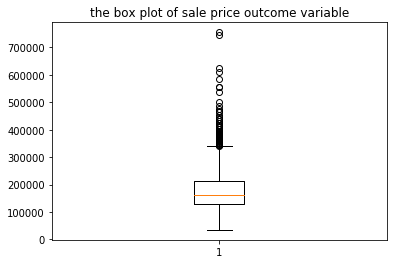

In [15]:
plt.boxplot(new_house_prices['saleprice']);
plt.title('the box plot of sale price outcome variable');

From the above box plot we can see that our target variable has outliers.Lets controle those outliers using winsorize function.First lets import scipy module.

Text(0.5, 0, 'Value of winsorized saleprice')

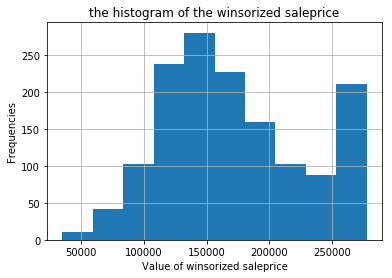

In [16]:
from scipy.stats.mstats import winsorize
winsor_saleprice = winsorize(new_house_prices["saleprice"], (0, 0.10))
winsor_saleprice = pd.Series(winsor_saleprice)
winsor_saleprice.hist();
plt.title('the histogram of the winsorized saleprice');
plt.ylabel('Frequencies')
plt.xlabel('Value of winsorized saleprice')

In [17]:
new_house_prices['winsor_saleprice'] = winsor_saleprice

Now lets see the relationship of the predictive variables to the outcome variable for the purpose of determining their hypothesised significance in influencing the target variable.One way to determine that relationship is through pandas correlation function for the numerical variables.We can also see the relationship between the predictive variables.

### visualizing Relationships

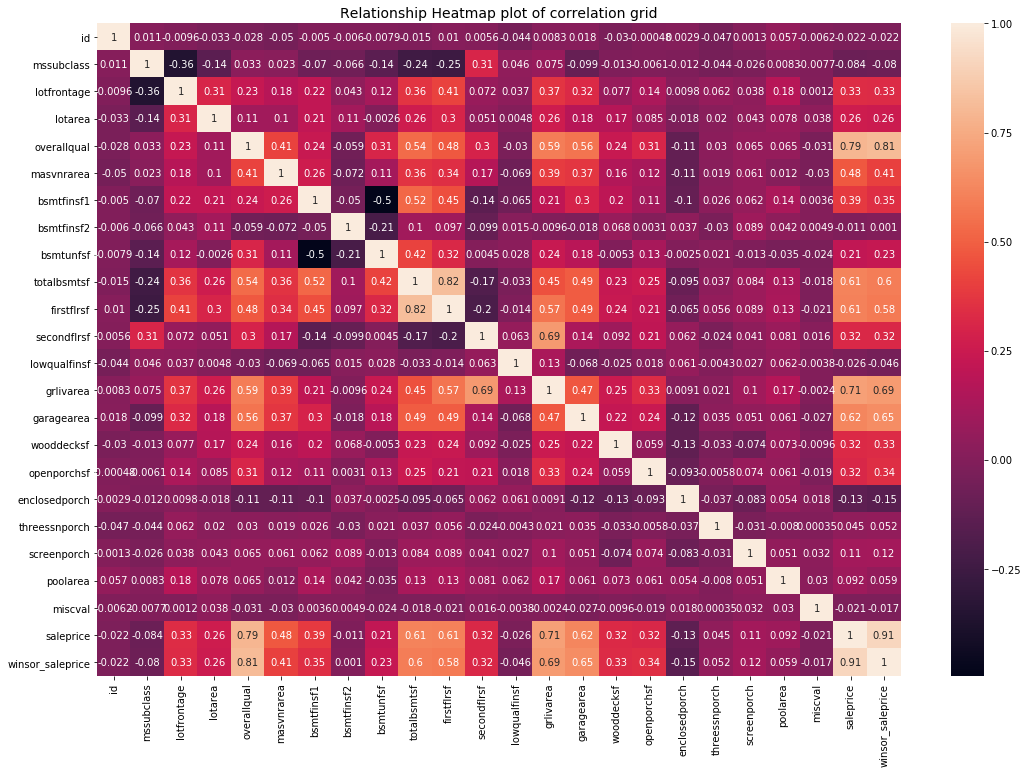

In [18]:
plt.figure(figsize = (18, 12))
sns.heatmap(new_house_prices.corr(), annot = True);
plt.title('Relationship Heatmap plot of correlation grid', fontsize = 14);

we can see that only 4 variables have correlation with the 'saleprice' with a value greater than 0.4.They seem to be potential for forming our features.Lets move on and explore our categorical variables and their relationship to the sale price(outcome).In this case i will use bar plots to identify the relationship visually.

In [19]:
selected_num_cols = new_house_prices.corr()[(new_house_prices.corr()['saleprice'] > 0.5) 
                                            & (new_house_prices.corr()['saleprice'] != 1) 
                                            & (new_house_prices.corr()['winsor_saleprice'] != 1)].index
print(selected_num_cols)

Index(['overallqual', 'totalbsmtsf', 'firstflrsf', 'grlivarea', 'garagearea'], dtype='object')


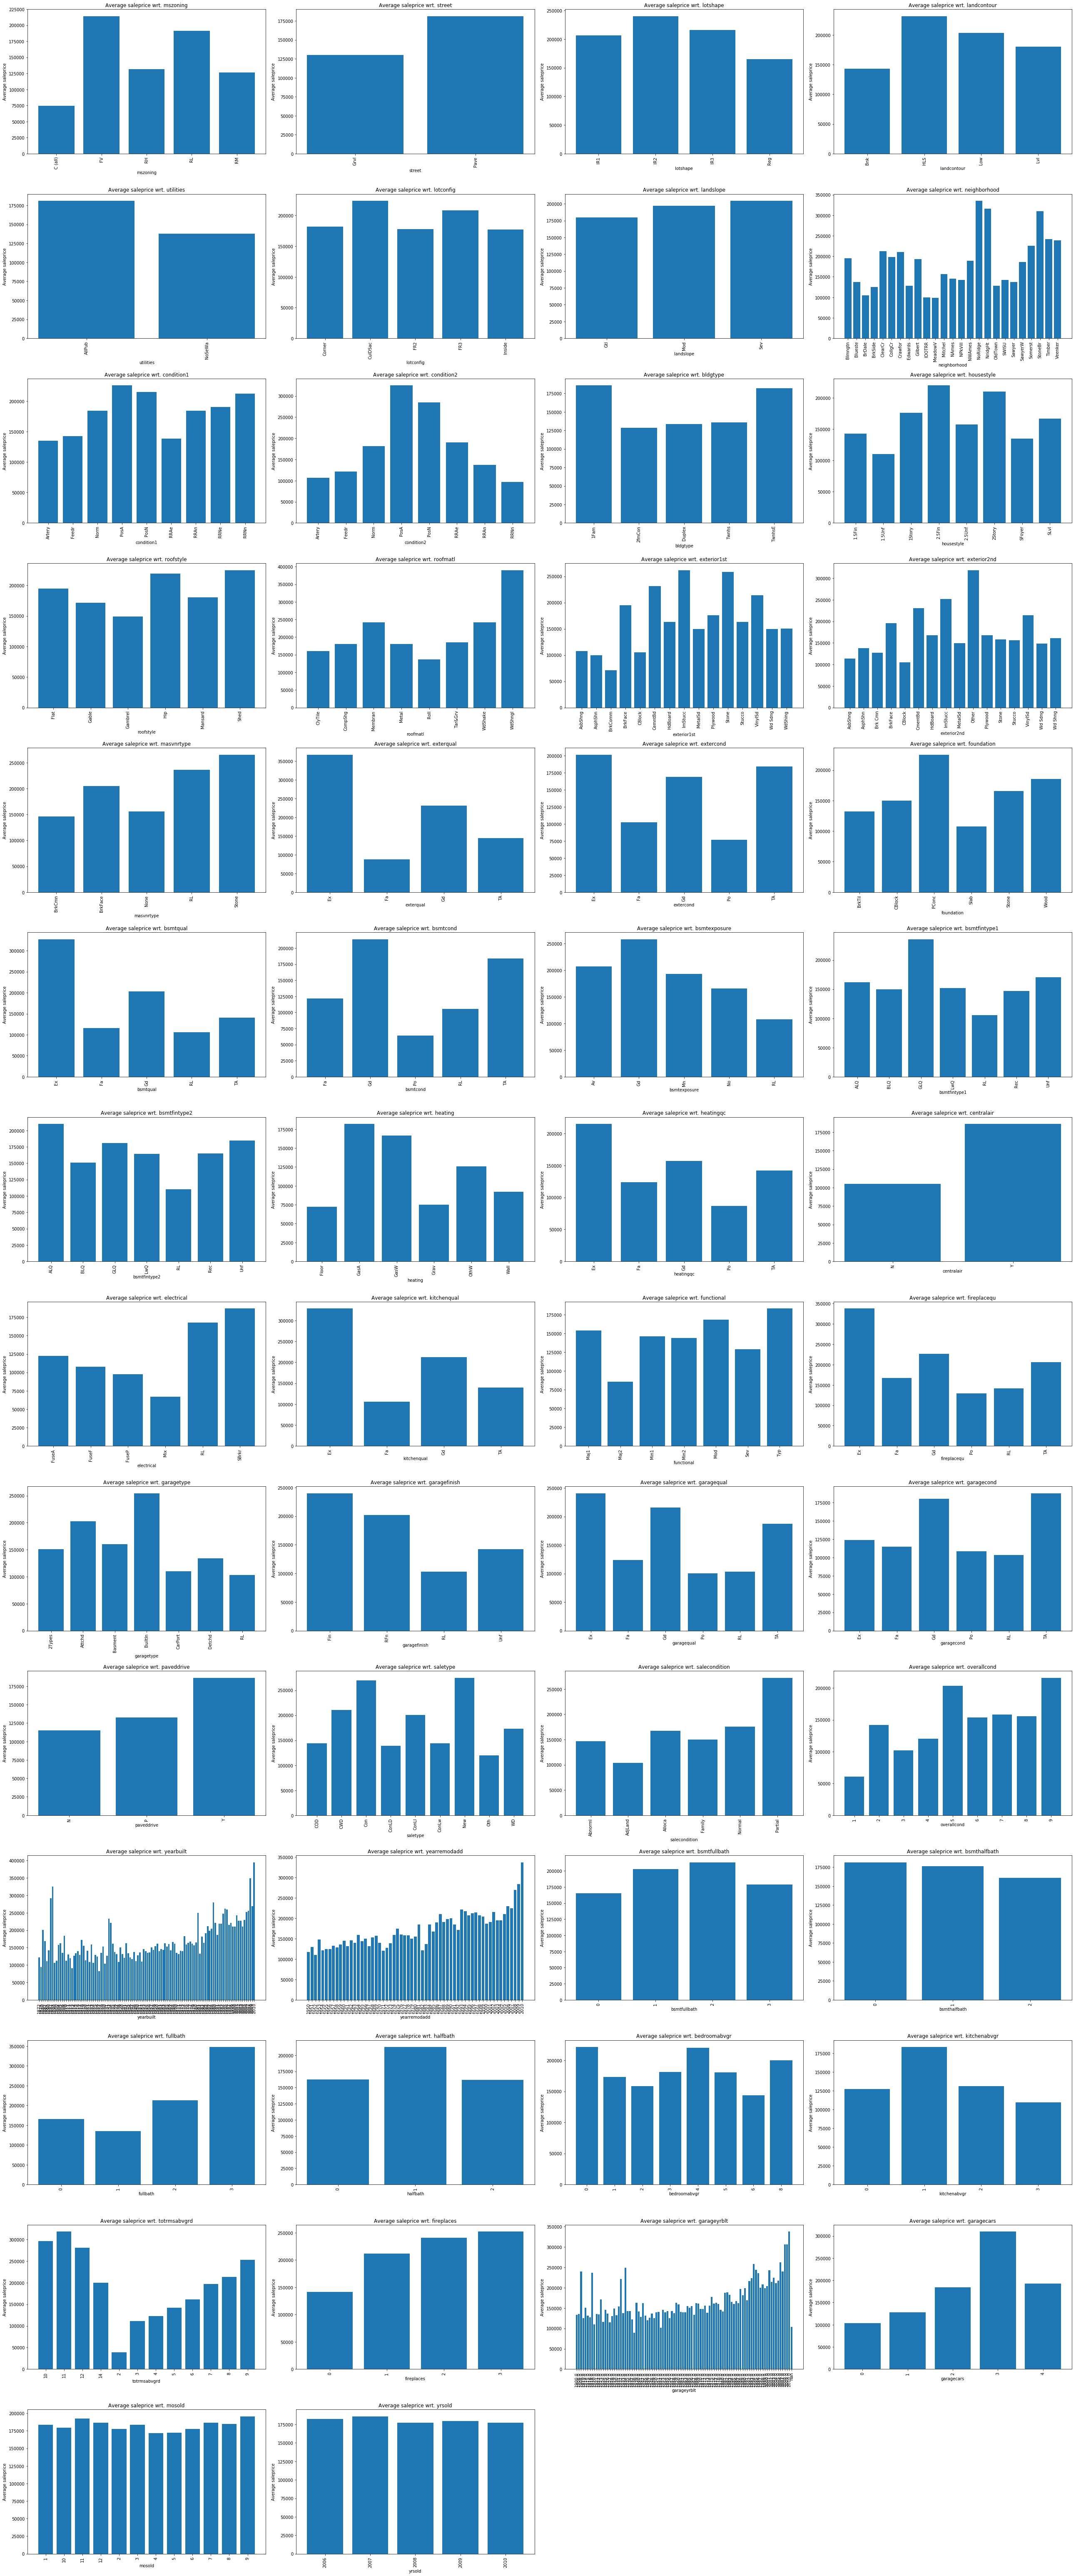

In [20]:
plt.figure(figsize = (36, 86))
for i, category in zip(range(len(final_categorical_vars)),final_categorical_vars):
    plt.subplot(14,4,i+1)
    plt.bar(new_house_prices.groupby(category)["saleprice"].mean().index
            , new_house_prices.groupby(category)["saleprice"].mean())
    plt.title("Average saleprice wrt. {}".format(category))
    plt.ylabel("Average saleprice")
    plt.xlabel(category)
    plt.xticks(rotation='vertical')
plt.tight_layout()

In [21]:

real_numeric['winsor_saleprice'] = winsor_saleprice
X = pd.concat([real_numeric[selected_num_cols], pd.get_dummies(final_categorical_vars.neighborhood
                                                             , drop_first = True)], axis = 1)
X = pd.concat([X, pd.get_dummies(final_categorical_vars.mszoning, drop_first = True)], axis = 1)
Y = new_house_prices['saleprice']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 440)
ols_model = LinearRegression()
ols_model.fit(X_train, Y_train)
predicted_train = ols_model.predict(X_train)
predicted_test = ols_model.predict(X_test)
print("R-squared of the model in training set is: {}".format(ols_model.score(X_train, Y_train)))
print("-----> Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ols_model.score(X_test, Y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, predicted_test)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, predicted_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, predicted_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - predicted_test) / Y_test)) * 100))

R-squared of the model in training set is: 0.8111039604423291
-----> Test set statistics-----
R-squared of the model in test set is: 0.7917993496835467
Mean absolute error of the prediction is: 23642.635015154065
Mean squared error of the prediction is: 1445902693.773947
Root mean squared error of the prediction is: 38025.02720280351
Mean absolute percentage error of the prediction is: 13.252551640512122


The R-squared performance test of the training and testing data was pretty much close and it is  0.8111039604423291 and 0.7917993496835467 respectively.Because there is no much difference in the tests of the two sets, we do not suspect overfitting.But incase the performance is improved lets try the other regularization rigression methods.Lets start with the Lasso regression over a range of possible alphas.This will lead us to the need of cross validation techniques.We will use gridsearch method to find the best parameter and the best score and finally another 10-fold cross validation on top of our gridsearchcv cross validation to compare the best scores and validate overfitting. 

In [23]:
x = real_numeric.drop(['id', 'saleprice', 'winsor_saleprice'], axis = 1)
for categ in final_categorical_vars.columns:
    if (categ != 'yearbuilt') & (categ != 'yearremodadd') & (categ != 'garageyrblt') & (categ != 'exterior1st') & (categ != 'exterior2nd'):
        x = pd.concat([x, pd.get_dummies(final_categorical_vars[categ], drop_first = True)], axis = 1)
        alphas = np.logspace(-5, 10, 25)
lasso = Lasso(random_state=0, max_iter=10000)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

grid_model = GridSearchCV(lasso, param_grid=tuned_parameters, cv=n_folds, refit=True)
grid_model.fit(x, Y)
print('The best score of our model is: {}'.format(grid_model.best_score_))
print('The best alpha estimator out of the tunned parameters alphas is: {}'
      .format(grid_model.best_estimator_.alpha))

print('Finally to check if our model is overfitting or not lets perform nested cross validation: {}'
      .format(cross_val_score(grid_model, x, Y, cv = 10)))

The best score of our model is: 0.8312888028414307
The best alpha estimator out of the tunned parameters alphas is: 316.22776601683796
Finally to check if our model is overfitting or not lets perform nested cross validation: [0.89266234 0.8904322  0.88775692 0.75873224 0.86679019 0.81671961
 0.87132145 0.8711627  0.59718584 0.88172319]


From the cross validation values we can learn that our model is not over fitting.

Now lets move to the Ridge regression,But for the ease of computer performance i have run cross_val_score function only for the lasso model.

In [24]:
alphas = np.logspace(-5, 10, 25)
ridge = Ridge(random_state=0, max_iter=10000)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

grid_model = GridSearchCV(ridge, param_grid=tuned_parameters, cv=n_folds, refit=True)
grid_model.fit(x, Y)
print('The best score of our model is: {}'.format(grid_model.best_score_))
print('The best alpha estimator out of the tunned parameters alphas is: {}'
      .format(grid_model.best_estimator_.alpha))

The best score of our model is: 0.8378764544699938
The best alpha estimator out of the tunned parameters alphas is: 17.78279410038923


And finally lets check the ElasticNet model

In [25]:
alphas = np.logspace(-5, 10, 25)
elasticnet = ElasticNet(random_state=0, max_iter=10000)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

grid_model = GridSearchCV(elasticnet, param_grid=tuned_parameters, cv=n_folds, refit=True)
grid_model.fit(x, Y)
print('The best score of our model is: {}'.format(grid_model.best_score_))
print('The best alpha estimator out of the tunned parameters alphas is: {}'
      .format(grid_model.best_estimator_.alpha))

The best score of our model is: 0.8363542679965482
The best alpha estimator out of the tunned parameters alphas is: 0.05623413251903491


Based on the above results we can see that our hypothesis of there is no overfitting was right as even the parameter optimization three linear regrassion models performed almost about the same with the OLS model except the fact that we included almost all the features for fitting in the regularization models as opposed to using intensive feature selection to include only those with high relationship with the dependent variable.we can see all the performance measure metrics are about the same value.Therefore OLS model will do the job better because of its simplicity.but if we are willing to take the effort in this case Ridge model outperformed all the other models with accuracy rate of 0.8378764544699938. 

### Adding external factors
Now lets see for other external factors that may influence our target variable housing sale prices.I have included GDP growth rate to my model as possible influencer,because historically there has been recession in 2008-2009 and this may hypothetically have significant influence on the house prices.Lets see its impact in our model for the five years in our dataset.

In [26]:
GDP_rates = {'2009': 46930, '2007': 47987, '2006': 46369, '2008': 48330, '2010': 48304}
inter_rates = {'2009': 5.04, '2007': 6.34, '2006': 6.41, '2008': 6.03, '2010': 4.69}
new_house_prices['gdp_rate'] = new_house_prices['yrsold']
new_house_prices['morgage_rate'] = new_house_prices['yrsold']
rates_added = new_house_prices.replace({'gdp_rate':GDP_rates, 'morgage_rate': inter_rates})
rates_added['interaction_rate'] = rates_added['gdp_rate'] * rates_added['totalbsmtsf'] * rates_added['morgage_rate']

lets check if interest rate have correlation with the outcome variable.

In [27]:
rates_added[['saleprice', 'interaction_rate']].corr()

,saleprice,interaction_rate
saleprice,1.000,0.589
interaction_rate,0.589,1.000


From the correlation values in the above we can have a general understanding that the added factors does not have significant effect on the outcome variable.Lets prove that by checking if there is any improvement in performance.

In [28]:
x = pd.concat([x, rates_added[['interaction_rate', 'gdp_rate', 'morgage_rate']]], axis = 1)

Now lets fit the lasso model because of its dimenssion reduction property and check for the bestmodel after implementing the new factors in to our data.

In [29]:
alphas = np.logspace(-5, 10, 25)
lasso = Lasso(random_state=0, max_iter=10000)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

grid_model = GridSearchCV(lasso, param_grid=tuned_parameters, cv=n_folds, refit=True)
grid_model.fit(x, Y)
print('The best score of our model is: {}'.format(grid_model.best_score_))
print('The best alpha estimator out of the tunned parameters alphas is: {}'
      .format(grid_model.best_estimator_.alpha))

The best score of our model is: 0.8321778926483324
The best alpha estimator out of the tunned parameters alphas is: 316.22776601683796


The model improved little bit but it is not worth the effort of adding more features and testing the model again.Lets try now elasticNet model and check if the performance is improved.

In [30]:
alphas = np.logspace(-5, 10, 25)
elasticnet = ElasticNet(random_state=0, max_iter=10000)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

grid_model = GridSearchCV(elasticnet, param_grid=tuned_parameters, cv=n_folds, refit=True)
grid_model.fit(x, Y)
print('The best score of our model is: {}'.format(grid_model.best_score_))
print('The best alpha estimator out of the tunned parameters alphas is: {}'
      .format(grid_model.best_estimator_.alpha))

The best score of our model is: 0.8379251821289625
The best alpha estimator out of the tunned parameters alphas is: 0.05623413251903491


Not much improvement.Finally lets try Ridge regression.

In [31]:
alphas = np.logspace(-5, 10, 25)
ridge = Ridge(random_state=0, max_iter=10000)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

grid_model = GridSearchCV(ridge, param_grid=tuned_parameters, cv=n_folds, refit=True)
grid_model.fit(x, Y)
print('The best score of our model is: {}'.format(grid_model.best_score_))
print('The best alpha estimator out of the tunned parameters alphas is: {}'
      .format(grid_model.best_estimator_.alpha))

The best score of our model is: 0.8392776740678618
The best alpha estimator out of the tunned parameters alphas is: 17.78279410038923


Almost all the models performed about the same with little higher rate in the Ridge model.